In [5]:
#GitHub: abhishekajmera

In [6]:
#USC ID: 8586888981

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import hamming_loss
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.metrics import hamming_loss, silhouette_score, accuracy_score
import statistics
from imblearn.over_sampling import SMOTE

1.
Multi-class and Multi-Label Classification Using Support Vector Machines

(a)
Download the Anuran Calls (MFCCs) Data Set from:
https://archive.ics.
uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29
. Choose 70% of the data
randomly as the training set

In [2]:
df = pd.read_csv('../Data/Frogs_MFCCs.csv')

In [3]:
labels = ['Family', 'Genus', 'Species']
df.columns
x_labs = ['MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3', 'MFCCs_ 4', 'MFCCs_ 5', 'MFCCs_ 6',
       'MFCCs_ 7', 'MFCCs_ 8', 'MFCCs_ 9', 'MFCCs_10', 'MFCCs_11', 'MFCCs_12',
       'MFCCs_13', 'MFCCs_14', 'MFCCs_15', 'MFCCs_16', 'MFCCs_17', 'MFCCs_18',
       'MFCCs_19', 'MFCCs_20', 'MFCCs_21', 'MFCCs_22']

In [4]:
train, test = train_test_split(df, test_size=0.3)
x_train = train[x_labs]
y_train = train[labels]
x_test = test[x_labs]
y_test = test[labels]

(b)
Each instance has three labels: Families, Genus, and Species. Each of the labels
has multiple classes. We wish to solve a multi-class and multi-label problem.
One of the most important approaches to multi-label classification is to train a
classifier for each label (binary relevance). We first try this approach:

i.
Research exact match and hamming score/ loss methods for evaluating multi-
label classification and use them in evaluating the classifiers in this problem.

In [5]:
#Exact Match Score: It is a mteric in multilabel classification. 
#Exact Match Score defines the subset accuracy,which is the number of obs for which the actual set of labels
#correspond to the predicted set of labels for that obervation. In other words, if the entire set of predicted
#labels for a sample strictly match the actual set of labels, then the subset accuracy will be 1.0, otherwise it is 0.0.

#Hamming Loss: Hamming Loss computes the average hamming distance between two set of samples. 
#It is the fraction of observations for which labels are not predicted properly.
#In other words, if an observation has 3 labels, and 2 out of these 3 labels are not predicted correctly,
#then the hamming distance is 2

ii.
Train a SVM for each of the labels, using Gaussian kernels and one versus
all classifiers. Determine the weight of the SVM penalty and the width of
the Gaussian Kernel using 10 fold cross validation.
1
You are welcome to try
to solve the problem with both standardized
2
and raw attributes and report
the results.

In [6]:
# y_pred = {}
# avg_hamming_gaussian=[]
# for i in labels:
#     parameters = [{'kernel': ['rbf'],
#                'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5],
#                 'C': [1, 10, 100, 1000]}]
#     clf = GridSearchCV(SVC(kernel='rbf',decision_function_shape='ovr'), parameters,cv=10)
#     clf.fit(x_train, y_train[[i]].values.ravel())
#     print("Best parameters :".format(i))
#     print()
#     print(clf.best_params_)
#     y_pred[i]= clf.predict(X_test)
#     print(classification_report(y_test[[i]].values.ravel(), y_pred[i]))
#     print("The hamming loss for class {} is {}".format(i,hamming_loss(y_test[[i]], y_pred[i])))
#     avg_hamming_gaussian.append(1- hamming_loss(y_test[[i]], y_pred[i]))
    
# df_match=pd.DataFrame()
# for i in labels:
#     df_match[i] = np.where(y_test[i] == y_pred[i],1,0)
# df_match['sum'] = df_match[labels].sum(axis=1)
# em = np.where(df_match['sum']==3,1.0,0).sum(axis=0)/len(df_match)
# print("the exact match is: {}".format(em))
# print("Average Hamming Score is {}".format(statistics.mean(avg_hamming_gaussian)))

In [7]:
from sklearn.multiclass import OneVsRestClassifier
c = np.logspace(-1, 4, 20)
gammas = np.linspace(0.1, 2, 20)

params = {'estimator__gamma':gammas, 'estimator__C':c}
svm_model = OneVsRestClassifier(SVC(kernel='rbf', tol=0.1))
gridModel = GridSearchCV(svm_model, param_grid=params, cv=KFold(10))

In [54]:
for i in labels:
    
    print(i)
    svm_mod = gridModel.fit(x_train, y_train[i])

    best_parmas = svm_mod.best_params_

    best_c = best_parmas['estimator__C']

    best_gamma = best_parmas['estimator__gamma']

    best_width = 1/np.sqrt(2*best_gamma)

    print('Best SVM Penalty:', best_c)
    print('Best Width of Gaussian Kernel:', best_width)

    pred = svm_mod.predict(x_test)

    exact_score = accuracy_score(pred, y_test[i])
    exact_loss = 1-exact_score

    hamming_losser = hamming_loss(pred, y_test[i])

    print('Exact Match Loss:', exact_loss)
    print('Hamming Loss:', hamming_losser)
    print('--------------------------------------------------------')

Family
Best SVM Penalty: 78.47599703514607
Best Width of Gaussian Kernel: 0.5590169943749475
Exact Match Loss: 0.0111162575266327
Hamming Loss: 0.0111162575266327
--------------------------------------------------------
Genus
Best SVM Penalty: 23.357214690901213
Best Width of Gaussian Kernel: 0.5270462766947299
Exact Match Loss: 0.014821676702176934
Hamming Loss: 0.014821676702176934
--------------------------------------------------------
Species
Best SVM Penalty: 42.81332398719391
Best Width of Gaussian Kernel: 0.5129891760425771
Exact Match Loss: 0.014358499305233918
Hamming Loss: 0.014358499305233904
--------------------------------------------------------


Standardized:

In [8]:
scaler = preprocessing.StandardScaler()
scaler = scaler.fit(df[x_labs])
scaled_train_x = scaler.transform(x_train)
scaled_test_x = scaler.transform(x_test)

In [56]:
for i in labels:
    
    print(i)
    svm_mod = gridModel.fit(scaled_train_x, y_train[i])

    best_parmas = svm_mod.best_params_

    best_c = best_parmas['estimator__C']

    best_gamma = best_parmas['estimator__gamma']

    best_width = 1/np.sqrt(2*best_gamma)

    
    print('Best SVM Penalty:', best_c)
    print('Best Width of Gaussian Kernel:', best_width)

    pred = svm_mod.predict(scaled_test_x)

    exact_score = accuracy_score(pred, y_test[i])
    exact_loss = 1-exact_score

    hamming_losser = hamming_loss(pred, y_test[i])

    print('Exact Match Loss:', exact_loss)
    print('Hamming Loss:', hamming_losser)
    print('--------------------------------------------------------')

Family
Best SVM Penalty: 2.0691380811147893
Best Width of Gaussian Kernel: 2.23606797749979
Exact Match Loss: 0.012968967114404872
Hamming Loss: 0.012968967114404817
--------------------------------------------------------
Genus
Best SVM Penalty: 3.79269019073225
Best Width of Gaussian Kernel: 2.23606797749979
Exact Match Loss: 0.015284854099119949
Hamming Loss: 0.015284854099119963
--------------------------------------------------------
Species
Best SVM Penalty: 2.0691380811147893
Best Width of Gaussian Kernel: 2.23606797749979
Exact Match Loss: 0.01806391848077815
Hamming Loss: 0.018063918480778138
--------------------------------------------------------


iii.
Repeat 1(b)ii with
L
1
-penalized SVMs.
3
Remember to standardize
4
the at-
tributes. Determine the weight of the SVM penalty using 10 fold cross vali-
dation.

In [9]:
l_mod = LinearSVC(penalty='l1', dual=False)
params = {'C':c}
l1GridModel = GridSearchCV(l_mod, params, cv=KFold(10))

In [114]:
import warnings
warnings.filterwarnings('ignore')
for i in labels:
    print(i)
    l1_model = l1GridModel.fit(scaled_train_x, y_train[i])

    best_params = l1_model.best_params_
    best_c = best_params['C']

    print('Best SVM Penalty:', best_c)

    pred = l1_model.predict(scaled_test_x)
    l1_score = accuracy_score(pred, y_test[i])
    l1_loss = 1- l1_score

    l1_hamming_loss = hamming_loss(pred, y_test[i])


    print('Exact Match Loss:', l1_loss)
    print('Hamming Loss:', l1_hamming_loss)
    print('---------------------------------------')

Family
Best SVM Penalty: 1.1288378916846888
Exact Match Loss: 0.05974988420565075
Hamming Loss: 0.05974988420565076
---------------------------------------
Genus
Best SVM Penalty: 143.8449888287663
Exact Match Loss: 0.03983325613710054
Hamming Loss: 0.03983325613710051
---------------------------------------
Species
Best SVM Penalty: 3.79269019073225
Exact Match Loss: 0.03427512737378413
Hamming Loss: 0.03427512737378416
---------------------------------------


In [10]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE()
# familyTrainDataX, familyTrainDataY = smote.fit_sample(trainDataX, trainDataY['Family'])
# genusTrainDataX, genusTrainDataY = smote.fit_sample(trainDataX, trainDataY['Genus'])
# speciesTrainDataX, speciesTrainDataY = smote.fit_sample(trainDataX, trainDataY['Species'])

In [11]:
# smote = SMOTE()
# familyTrainDataX, familyTrainDataY = smote.fit_sample(trainDataX, trainDataY['Family'])
# genusTrainDataX, genusTrainDataY = smote.fit_sample(trainDataX, trainDataY['Genus'])
# speciesTrainDataX, speciesTrainDataY = smote.fit_sample(trainDataX, trainDataY['Species']

iv.
Repeat 1(b)iii by using SMOTE or any other method you know to remedy
class imbalance. Report your conclusions about the classifiers you trained.

In [12]:
l1SmoteSVMModel = LinearSVC(penalty='l1', dual=False)
l1SmoteParameters = {'C':c}
l1SmoteGridModel = GridSearchCV(l1SmoteSVMModel, l1SmoteParameters, cv=KFold(10))

In [16]:
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

smote = SMOTE()
for i in labels:
    print(i)
    smote_train_x, smote_train_y = smote.fit_resample(scaled_train_x, y_train[i])
    smote_model = l1SmoteGridModel.fit(smote_train_x, smote_train_y)

    best_params = smote_model.best_params_
    best_c = best_params['C']
    best_c = round(best_c, 3)
    print('Best SVM Penalty:', best_c)

    pred = smote_model.predict(scaled_test_x)
    smote_score = accuracy_score(pred, y_test[i])
    l1_smote_score = 1-smote_score

    smote_hamming = hamming_loss(pred, y_test[i])


    print('Exact Match Loss:', l1_smote_score)
    print('Hamming Loss:', smote_hamming)
    print('---------------------------------------------------------------------')

Family
Best SVM Penalty: 0.616
Exact Match Loss: 0.0805928670680871
Hamming Loss: 0.08059286706808708
---------------------------------------------------------------------
Genus
Best SVM Penalty: 12.743
Exact Match Loss: 0.09263547938860583
Hamming Loss: 0.09263547938860583
---------------------------------------------------------------------
Species
Best SVM Penalty: 263.665
Exact Match Loss: 0.04770727188513202
Hamming Loss: 0.047707271885132005
---------------------------------------------------------------------


2.
K-Means Clustering on a Multi-Class and Multi-Label Data Set
Monte-Carlo Simulation:
Perform the following procedures 50 times, and report
the average and standard deviation of the 50 Hamming Distances that you calculate

(a)
Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split
the data into train and test, as we are not performing supervised learning in this
exercise). Choose
k
∈ {
1
,
2
, . . . ,
50
}
automatically based

In [13]:
from sklearn.cluster import KMeans
import operator
best_clust = {}
for i in range(1, 51):
    ss_score = {}
    for k in range(2, 51):
        kMeansModel = KMeans(n_clusters=k)
        kMeansModel = kMeansModel.fit(df[x_labs])
        clusterIndex = kMeansModel.labels_
        score = silhouette_score(df[x_labs], clusterIndex)
        ss_score[k] = score

    score_sort = sorted(ss_score.items(), key=operator.itemgetter(1), reverse=True)
    bestCluster = score_sort[0][0]
    best_clust[i] = bestCluster

In [14]:
bestCluster

4

In [15]:
tab_data = []
for i in range(1, 51):
    inst = []
    inst.append('Iteration ' + str(i))
    inst.append(best_clust[i])
    tab_data.append(inst)
pd.DataFrame(tab_data, columns = ['Iteration', 'Optimal cluster no'])

,Iteration,Optimal cluster no
0,Iteration 1,4
1,Iteration 2,4
2,Iteration 3,4
3,Iteration 4,4
4,Iteration 5,4
5,Iteration 6,4
6,Iteration 7,4
7,Iteration 8,4
8,Iteration 9,4
9,Iteration 10,4


(b)
In each cluster, determine which family is the majority by reading the true labels.
Repeat for genus and species.

In [16]:
clust_index = {}
for i in range(1, 51):
    mod_fin = KMeans(n_clusters=bestCluster)
    mod_fin = mod_fin.fit(df[x_labs])
    cluter_indexed = mod_fin.labels_
    clust_index[i] = cluter_indexed

tab_data = []
for itera in range(1, 51):
    bestCluster = best_clust[itera]
    cluter_indexed = clust_index[itera]
    clusterLabel = []
    for i in range(0, bestCluster):
        family = {}
        genus = {}
        species = {}
        for j in range(0, len(df[labels])):
            if cluter_indexed[j]==i:
                fam = df['Family'][j]
                if fam in family.keys():
                    family[fam] += 1
                else:
                    family[fam] = 1

                gen = df['Genus'][j]
                if gen in genus.keys():
                    genus[gen] += 1
                else:
                    genus[gen] = 1

                specy = df['Species'][j]
                if specy in species.keys():
                    species[specy] += 1
                else:
                    species[specy] = 1

        fam_sort = sorted(family.items(), key=operator.itemgetter(1), reverse=True)
        sort_gen = sorted(genus.items(), key=operator.itemgetter(1), reverse=True)
        species_sort = sorted(species.items(), key=operator.itemgetter(1), reverse=True)

        fam_lab = fam_sort[0][0]
        gen_lab = sort_gen[0][0]
        spec_lab = species_sort[0][0]

        label = {}
        label['Family'] = fam_lab
        label['Genus'] = gen_lab
        label['Species'] = spec_lab
        clusterLabel.append(label)
  
    for i in range(0, bestCluster):
        row = []
        row.append('Iteration ' + str(itera))
        row.append('Cluster ' + str(i+1))
        row.append(clusterLabel[i]['Family'])
        row.append(clusterLabel[i]['Genus'])
        row.append(clusterLabel[i]['Species'])
        tab_data.append(row)

In [17]:
pd.DataFrame(tab_data, columns = ['Iteration','Cluster','Family','Genus','Species'])

,Iteration,Cluster,Family,Genus,Species
0,Iteration 1,Cluster 1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Iteration 1,Cluster 2,Hylidae,Hypsiboas,HypsiboasCordobae
2,Iteration 1,Cluster 3,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Iteration 1,Cluster 4,Hylidae,Hypsiboas,HypsiboasCinerascens
4,Iteration 2,Cluster 1,Dendrobatidae,Ameerega,Ameeregatrivittata
...,...,...,...,...,...
195,Iteration 49,Cluster 4,Dendrobatidae,Ameerega,Ameeregatrivittata
196,Iteration 50,Cluster 1,Hylidae,Hypsiboas,HypsiboasCordobae
197,Iteration 50,Cluster 2,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
198,Iteration 50,Cluster 3,Dendrobatidae,Ameerega,Ameeregatrivittata


(c)
Now for each cluster you have a majority label triplet (family, genus, species).
Calculate the average Hamming distance, Hamming score, and Hamming loss
5
between the true labels and the labels assigned by clusters.

In [18]:
avg_ham_loss = []
avg_ham_score = []
for iteration in range(1,51):
    clusterIndex = clust_index[iteration]
    pred_fam = []
    pred_gen = []
    pred_spec = []
    for i in range(0, len(df[labels])):
        clusterName = clusterIndex[i]
        label = clusterLabel[clusterName]
        fam_label = label['Family']
        gen_lab = label['Genus']
        spec_lab = label['Species']

        pred_fam.append(fam_label)
        pred_gen.append(gen_lab)
        pred_spec.append(spec_lab)

    fam_act = np.array(df['Family'])
    act_gen = np.array(df['Genus'])
    act_spec = np.array(df['Species'])

    pred_fam = np.array(pred_fam)
    pred_gen = np.array(pred_gen)
    pred_spec = np.array(pred_spec)

    fam_ham_loss = hamming_loss(pred_fam, fam_act)

    fam_ham_score = accuracy_score(pred_fam, fam_act)


    gen_ham_loss = hamming_loss(pred_gen, act_gen)

    gen_ham_score = accuracy_score(pred_gen, act_gen)


    spec_ham_loss = hamming_loss(pred_spec, act_spec)

    spac_ham_score = accuracy_score(pred_spec, act_spec)

    
    avg_ham_loss_iter = (fam_ham_loss + gen_ham_loss + spec_ham_loss)/3

    avg_ham_score_iter = (fam_ham_score + gen_ham_score + spac_ham_score)/3

    
    avg_ham_loss.append(avg_ham_loss_iter)
    avg_ham_score.append(avg_ham_score_iter)

In [19]:
# avgHammingScore

In [20]:
# avgHammingLoss

In [21]:
tab_dat = []
for i in range(1, 51):
    row = []
    row.append('Iteration ' + str(i))
    row.append(avg_ham_loss[i-1])
    row.append(avg_ham_score[i-1])
    tab_dat.append(row)
pd.DataFrame(tab_dat, columns = ['Iteration','Avg hamming loss','Avg hamming score'])

,Iteration,Avg hamming loss,Avg hamming score
0,Iteration 1,0.804494,0.195506
1,Iteration 2,0.428307,0.571693
2,Iteration 3,0.222423,0.777577
3,Iteration 4,0.888070,0.111930
4,Iteration 5,0.285152,0.714848
5,Iteration 6,0.887283,0.112717
6,Iteration 7,0.936669,0.063331
7,Iteration 8,0.887283,0.112717
8,Iteration 9,0.760806,0.239194
9,Iteration 10,0.816169,0.183831


In [22]:
mean_ham_loss = statistics.mean(avg_ham_loss)


std_ham_loss = statistics.stdev(avg_ham_loss)


mean_ham_score = statistics.mean(avg_ham_score)


std_ham_score = statistics.stdev(avg_ham_score)



In [23]:
mean_ham_loss

0.642004169562196

In [24]:
std_ham_loss

0.27610378440131333

In [25]:
mean_ham_score

0.35799583043780403

In [26]:
std_ham_score

0.27610378440131333

In [27]:
# ISLR 12.6.2

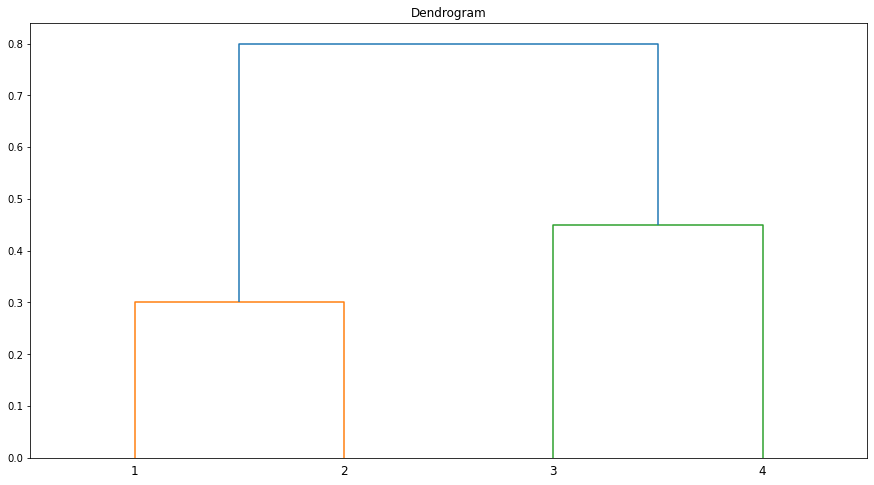

In [108]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

import matplotlib.pyplot as plt

dis_mat = np.array([[0.0, 0.3, 0.4, 0.7], [0.3, 0.0, 0.5, 0.8], [0.4, 0.5, 0.0, 0.45], [0.7, 0.8, 0.45, 0.0]])
distances = squareform(dis_mat)
link_mat = linkage(distances, "complete")
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
dendrogram(link_mat, labels=["1", "2", "3", "4"])
plt.title("Dendrogram")
plt.show()

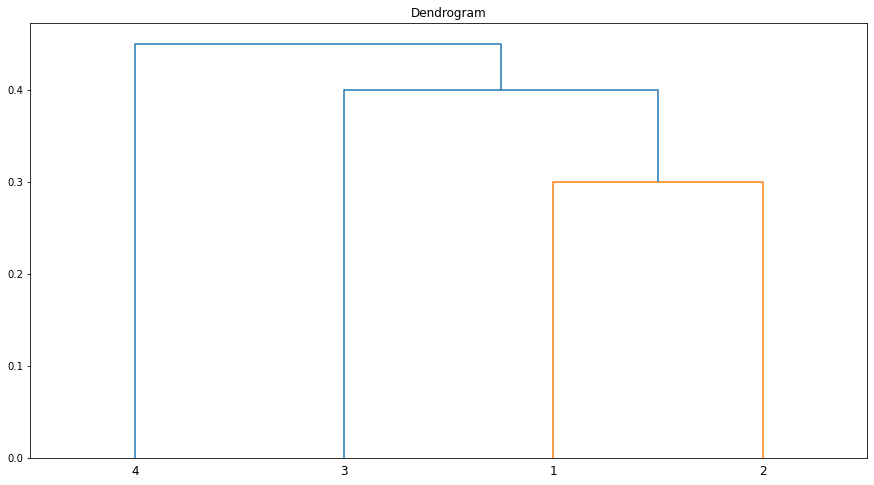

In [109]:
link_mat = linkage(dists, "single")
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
dendrogram(link_mat, labels=["1", "2", "3", "4"])
plt.title("Dendrogram")
plt.show()

In [ ]:
# c) Obs 1 and 2 are in cluster A and 3 and 4 in cluster B.

In [110]:
# d) Obs 1, 2 and 3 are in cluster A and 4 in cluster B

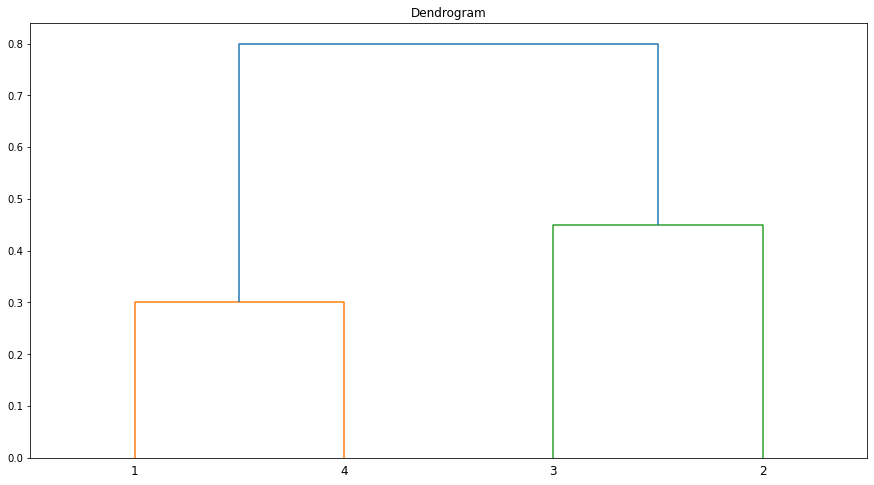

In [112]:
dis_mat = np.array([[0.0, 0.3, 0.4, 0.7], [0.3, 0.0, 0.5, 0.8], [0.4, 0.5, 0.0, 0.45], [0.7, 0.8, 0.45, 0.0]])
distances = squareform(dis_mat)
link_mat = linkage(distances, "complete")
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
dendrogram(link_mat, labels=["1", "4", "3", "2"])
plt.title("Dendrogram")
plt.show()